## Lei (Raymond) Chi and Arav Sharma 
## Question 1

Error rate from simulation: 0.2
Error rate from theoretical: 0.18615622680831534
Minimum Risk Point for A=2: TPR=0.86, FPR=0.12, Risk=0.14


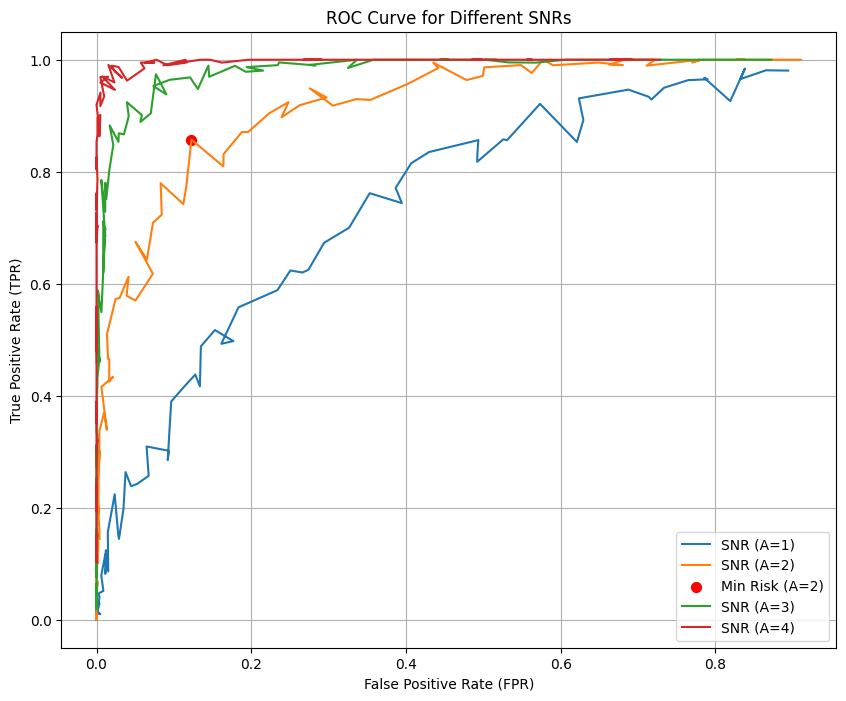

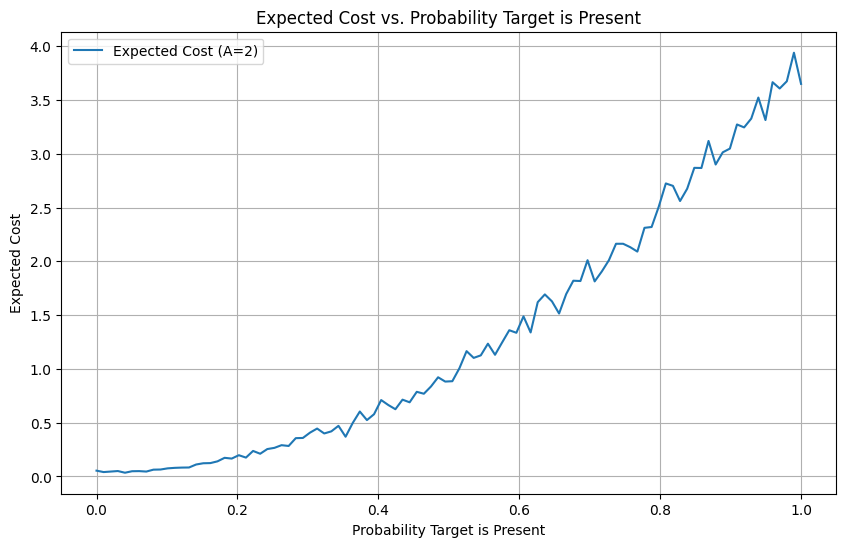

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


A = 1
sigma = 1
P_present = 0.2
P_absent = 0.8
numOfSamples = 1000

def getThreshold(A, sigma, P_present, P_absent):
    return (sigma**2 / A) * np.log(P_absent / P_present) + A/2

def simulateRadarDetection(N, A, sigma, threshold, P_present, P_absent):
    errors = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for _ in range(N):
        present = np.random.rand() < P_present
        X = np.random.normal(0, sigma)
        Y = A + X if present else X
        detected_present = Y > threshold
        if detected_present:
            if present:
                TP += 1
            else:
                FP += 1
                errors += 1
        else:
            if present:
                FN += 1
                errors += 1
            else:
                TN += 1
    TPR = TP / (TP + FN) if TP + FN > 0 else 0
    FPR = FP / (FP + TN) if FP + TN > 0 else 0
    R = 10 * FN / N * P_present + FP / N * P_absent
    error_rate = errors / N
    return error_rate, TPR, FPR, R

def theoreticalError(A, sigma, threshold, P_present, P_absent):
    P_FP = 1 - norm.cdf(threshold, 0, sigma)  # False positive
    P_FN = norm.cdf(threshold, A, sigma)      # False negative
    return P_FN * P_present + P_FP * P_absent

def plotROC(A_values, sigma, numOfSamples):
    plt.figure(figsize=(10, 8))
    for A in A_values:
        threshold = getThreshold(A, sigma, P_present, P_absent)
        TPRs, FPRs, risks = [], [], []
        for thresh in np.linspace(threshold - 3, threshold + 3, 100):
            _, TPR, FPR, R = simulateRadarDetection(numOfSamples, A, sigma, thresh, P_present, P_absent)
            TPRs.append(TPR)
            FPRs.append(FPR)
            risks.append((R, TPR, FPR))
        min_risk = min(risks, key=lambda x: x[0]) 
        plt.plot(FPRs, TPRs, label=f'SNR (A={A})')
        if A == 2:
            plt.scatter(min_risk[2], min_risk[1], color='red', s=50, label='Min Risk (A=2)')
            print(f"Minimum Risk Point for A=2: TPR={min_risk[1]:.2f}, FPR={min_risk[2]:.2f}, Risk={min_risk[0]:.2f}")
    plt.title('ROC Curve for Different SNRs')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plotCostVsProbability(A, sigma, numOfSamples):
    probabilities = np.linspace(0, 1, 100)
    costs = []
    
    fixed_P_present = 0.2 
    fixed_P_absent = 0.8  
    threshold = getThreshold(A, sigma, fixed_P_present, fixed_P_absent)
    
    for varying_P_present in probabilities:
        
        _, _, _, cost = simulateRadarDetection(numOfSamples, A, sigma, threshold, varying_P_present, 1 - varying_P_present)
        costs.append(cost)

    plt.figure(figsize=(10, 6))
    plt.plot(probabilities, costs, label=f'Expected Cost (A={A})')
    plt.title('Expected Cost vs. Probability Target is Present')
    plt.xlabel('Probability Target is Present')
    plt.ylabel('Expected Cost')
    plt.grid(True)
    plt.legend()
    plt.show()


# Main execution
threshold = getThreshold(A, sigma, P_present, P_absent)
error_rate, TPR, FPR, _ = simulateRadarDetection(numOfSamples, A, sigma, threshold, P_present, P_absent)
theoretical_error = theoreticalError(A, sigma, threshold, P_present, P_absent)
print("Error rate from simulation:", error_rate)
print("Error rate from theoretical:", theoretical_error)

plotROC([1, 2, 3, 4], sigma, numOfSamples)  # Part (b) and (c)
plotCostVsProbability(2, sigma, numOfSamples)  # Part (d)


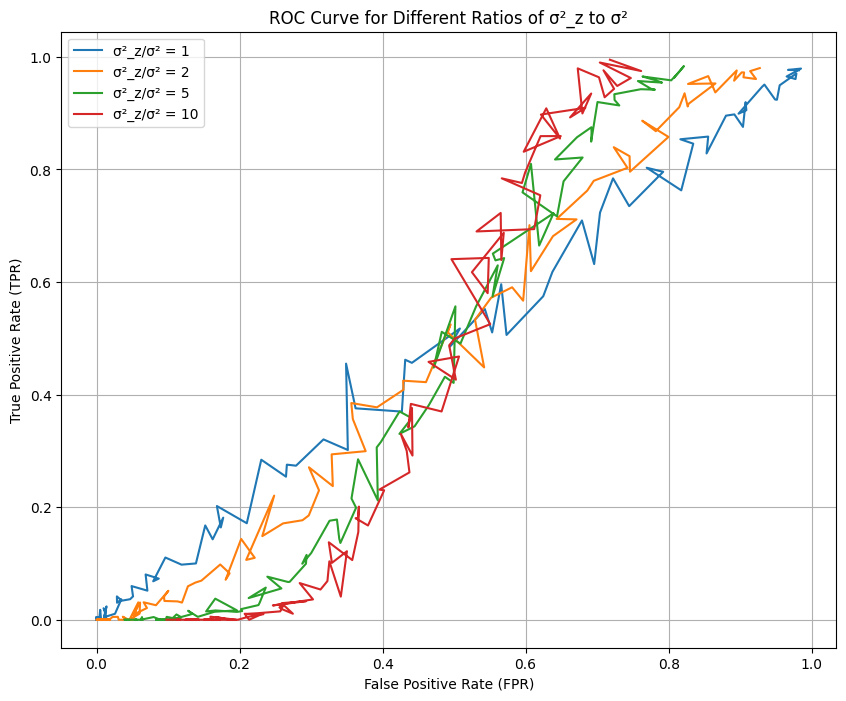

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


def getThreshold(A, sigma, P_present, P_absent):
    return (sigma**2 / A) * np.log(P_absent / P_present) + A/2
def simulateRadarDetection(N, A, sigma, sigma_z, threshold, P_present, P_absent):
    errors = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for _ in range(N):
        present = np.random.rand() < P_present
        X = np.random.normal(0, sigma)
        Z = np.random.normal(0, sigma_z)
        Y = A + X if present else A + Z  
        detected_present = Y > threshold
        if detected_present:
            if present:
                TP += 1
            else:
                FP += 1
                errors += 1
        else:
            if present:
                FN += 1
                errors += 1
            else:
                TN += 1
    TPR = TP / (TP + FN) if TP + FN > 0 else 0
    FPR = FP / (FP + TN) if FP + TN > 0 else 0
    return TPR, FPR

def plotROC(A, sigma, sigma_z_ratios, numOfSamples):
    plt.figure(figsize=(10, 8))
    for sigma_z_ratio in sigma_z_ratios:
        sigma_z = sigma * np.sqrt(sigma_z_ratio)  # Calculate σ_z based on the ratio
        threshold = getThreshold(A, sigma, P_present, P_absent)
        TPRs, FPRs = [], []
        for thresh in np.linspace(threshold - 3, threshold + 3, 100):
            TPR, FPR = simulateRadarDetection(numOfSamples, A, sigma, sigma_z, thresh, P_present, P_absent)
            TPRs.append(TPR)
            FPRs.append(FPR)
        plt.plot(FPRs, TPRs, label=f'σ²_z/σ² = {sigma_z_ratio}')
    plt.title('ROC Curve for Different Ratios of σ²_z to σ²')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()


A = 1
sigma = 1
P_present = 0.2
P_absent = 0.8
numOfSamples = 1000
sigma_z_ratios = [1, 2, 5, 10] 

plotROC(A, sigma, sigma_z_ratios, numOfSamples)